## **Business Problem**

**1. Context** 

The banking industry is currently undergoing a significant transformation driven by technological advancements, regulatory changes, and evolving consumer preferences. Digital transformation is at the forefront, with traditional banks adopting fintech solutions to enhance their digital services. Mobile banking apps, digital wallets, and online lending platforms have become ubiquitous, providing customers with more accessible and convenient banking options. Moreover, the exploration of blockchain technology is offering secure and transparent transaction methods, while cryptocurrencies are beginning to gain acceptance within the financial sector.

On the regulatory front, banks are facing increased scrutiny, necessitating robust compliance frameworks to manage risks and ensure transparency. Initiatives like open banking are encouraging innovation by allowing third-party developers to build applications around financial institutions, leading to greater competition and improved service offerings. Consumer behavior is also evolving, with a notable shift towards online banking. Customers now demand seamless, on-the-go access to banking services, pushing banks to continuously innovate and enhance their digital interfaces to meet these expectations.

**2. Problem Statement**

Leveraging predictive analytics has become crucial for banks to gain insights and maintain a competitive edge, particularly in campaigns targeting potential depositors. By analyzing customer data, banks can identify patterns and predict behaviors, such as the likelihood of a customer opening a new account or making a significant deposit. These insights enable personalized marketing strategies, improving the effectiveness of campaigns and enhancing customer engagement. Furthermore, predictive models can assist in identifying high-potential customers, allowing banks to focus their efforts on individuals most likely to respond positively to deposit campaigns. As the banking industry continues to evolve, the ability to harness the power of data through advanced analytics will be a key differentiator for banks aiming to attract and retain depositors in a digital-first world

**3. Goal**

To predict whether a customer will subscribe to a term deposit based on their demographic and contact information.


**4. Analytic Approach**

We will perform exploratory data analysis to understand the dataset and identify patterns or trends. Following this, we will build a classification model to predict the likelihood of a customer subscribing to a term deposit. This model will be trained using the provided customer data, which includes features such as age, job, balance, housing loan status, and previous campaign outcomes.ca


**5. Metric Evaluation**

We will use precision as our primary evaluation metric. The reason for focusing on precision is to minimize the number of false positives, which means reducing the number of customers who are predicted to subscribe but do not actually subscribe. This is particularly important because contacting these customers incurs costs and wastes resources, which we aim to minimize.

- False Positive (FP): A customer predicted to subscribe, but who does not, leading to wasted effort and resources. Reducing false positives will help make the marketing campaign more cost-effective.
- False Negative (FN): A potential customer predicted not to subscribe, but who actually does subscribe, resulting in a missed opportunity. While reducing false negatives is also important, our primary focus will be on reducing false positives to improve the efficiency of the campaign.

By optimizing for precision, we aim to ensure that our marketing efforts are focused on the most promising prospects, thereby improving the overall efficiency and cost-effectiveness of the bank's marketing campaigns.

## **Data Understanding**


Features:
- age: Age of the customer
- job: Type of job
- balance: Account balance
- housing: Housing loan status
- loan: Personal loan status
- contact: Contact communication type
- month: Last contact month of the year
- campaign: Number of contacts performed during this campaign
- pdays: Number of days since the client was last contacted from a previous campaign
- poutcome: Outcome of the previous marketing campaign

Target:
- deposit: Target variable, indicating whether the customer subscribed to a term deposit

## **Dataset**

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, confusion_matrix, recall_score, fbeta_score, make_scorer

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler, NearMiss
# from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [160]:
bank= pd.read_csv('data_bank_marketing_campaign.csv')
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [161]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [162]:
# Separate numerical and categorical columns
numerical_columns = bank.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = bank.select_dtypes(include=['object']).columns

# Summary statistics for numerical variables
summary_statistics = bank[numerical_columns].describe()

summary_statistics

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


In [163]:
# Check for missing values
missing_values = bank.isnull().sum()

missing_values

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

In [164]:
# Value counts for categorical variables
value_counts = {col: bank[col].value_counts() for col in categorical_columns}

value_counts

{'job': job
 management       1792
 blue-collar      1346
 technician       1291
 admin.            936
 services          658
 retired           540
 self-employed     280
 unemployed        249
 student           247
 entrepreneur      236
 housemaid         184
 unknown            54
 Name: count, dtype: int64,
 'housing': housing
 no     4140
 yes    3673
 Name: count, dtype: int64,
 'loan': loan
 no     6789
 yes    1024
 Name: count, dtype: int64,
 'contact': contact
 cellular     5628
 unknown      1639
 telephone     546
 Name: count, dtype: int64,
 'month': month
 may    1976
 aug    1085
 jul    1050
 jun     857
 apr     662
 nov     657
 feb     534
 oct     286
 jan     227
 sep     212
 mar     199
 dec      68
 Name: count, dtype: int64,
 'poutcome': poutcome
 unknown    5819
 failure     848
 success     761
 other       385
 Name: count, dtype: int64,
 'deposit': deposit
 no     4081
 yes    3732
 Name: count, dtype: int64}

In [165]:
# Correlation matrix for numerical variables
correlation_matrix = bank[numerical_columns].corr()

correlation_matrix

,age,balance,campaign,pdays
age,1.000000,0.099763,0.001411,0.008268
balance,0.099763,1.000000,-0.010505,0.011394
campaign,0.001411,-0.010505,1.000000,-0.104761
pdays,0.008268,0.011394,-0.104761,1.000000


## **EDA**

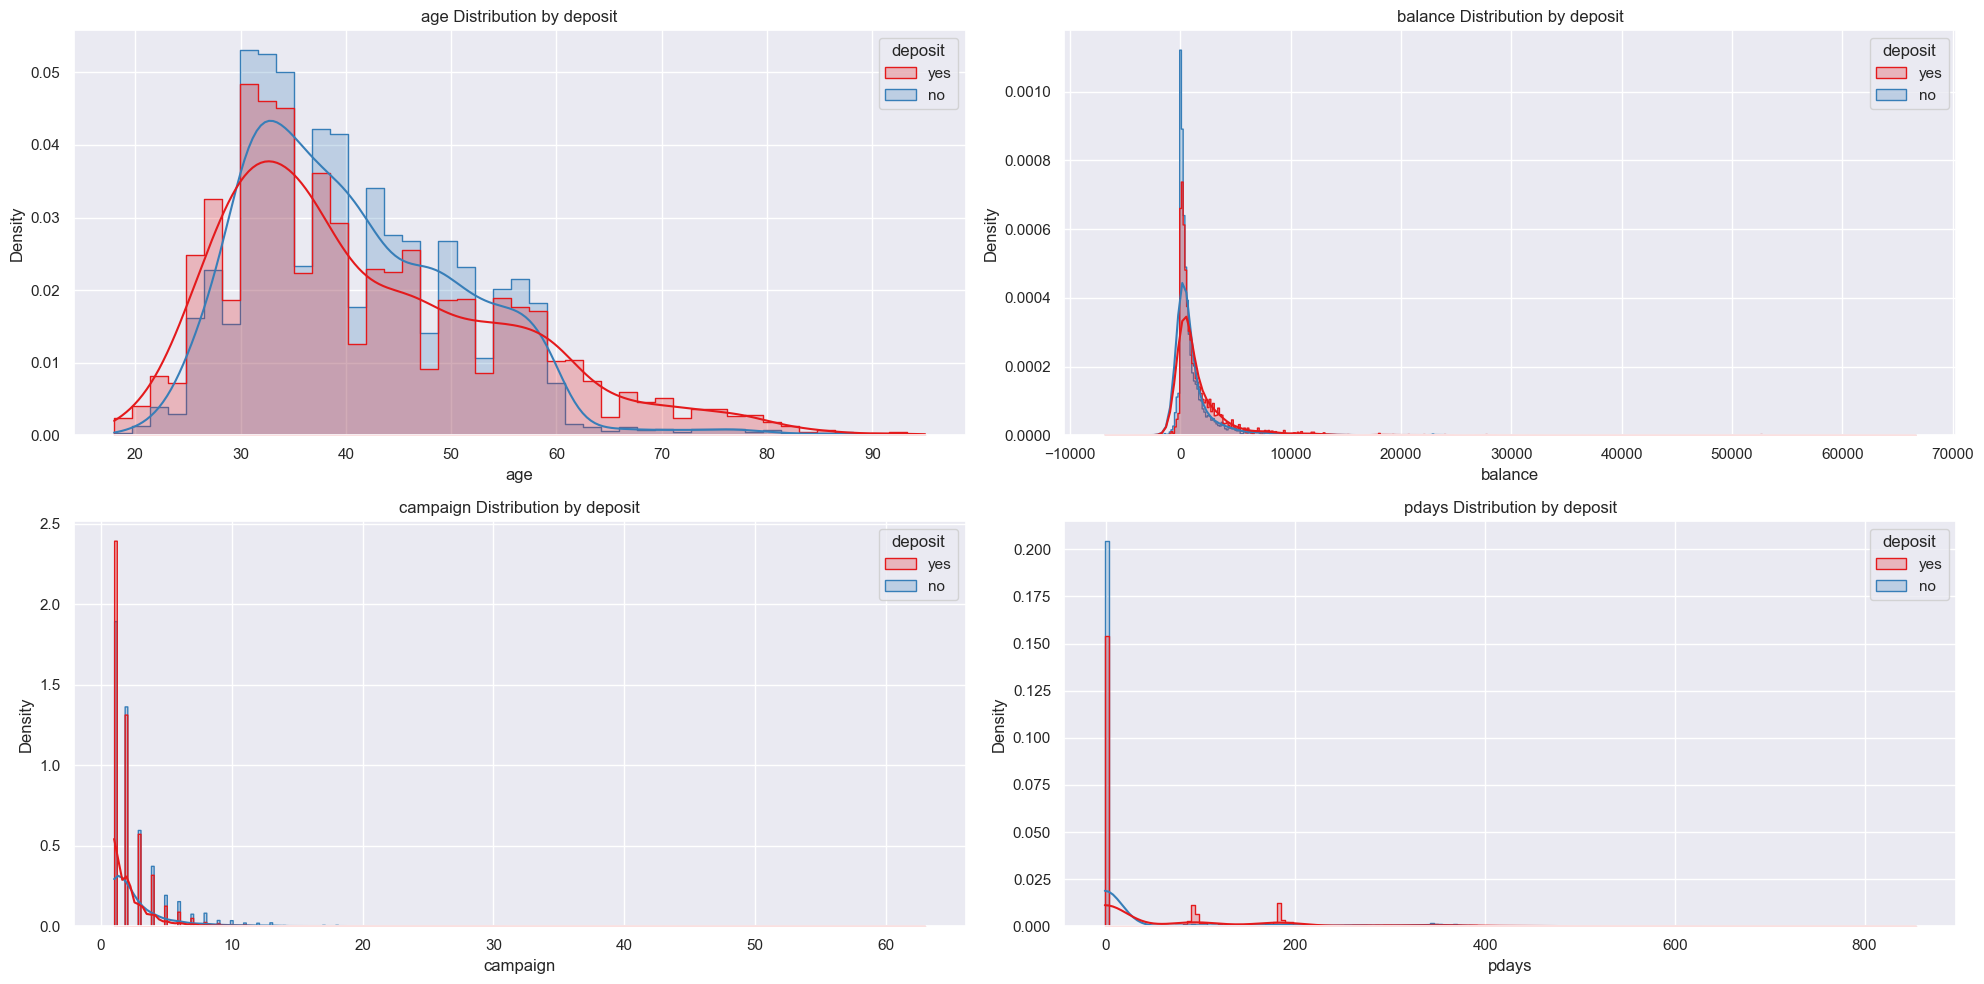

In [166]:
# Define the features to plot
features = ['age', 'balance', 'campaign', 'pdays']

# Set the figure size
plt.figure(figsize=(20, 10))
sns.set(palette='Set1')
plotnumber = 1

# Plot each feature
for feature in features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.histplot(data=bank, x=feature, hue='deposit', kde=True, element="step", stat="density", common_norm=False)
    plt.xlabel(feature)
    plt.title(f'{feature} Distribution by deposit')
    plotnumber += 1
    plt.tight_layout()

plt.show()

### Interpretation

**Age Distribution by Deposit**
- Customers who subscribed to a deposit tend to have a broader age range, with significant density around 30-50 years. Those who did not subscribe have a similar peak but with slightly higher density in the younger age range (20-30 years).
- Middle-aged individuals (30-50 years) seem more inclined to subscribe to a deposit. Younger individuals (20-30 years) have a higher density of not subscribing.

**Balance Distribution by Deposit**
- The balance distribution is heavily skewed to the right for both categories. The majority of customers, regardless of whether they subscribed or not, have low balances, with the density rapidly decreasing as the balance increases.
- Customers with lower balances are more common, but there is a slight increase in density for customers with higher balances subscribing to deposits. However, extreme balances do not significantly impact the likelihood of subscribing.

** Campaign Distribution by Deposit**
- Most of the campaign values are concentrated around lower numbers (1-10). Both categories show a rapid decline in density as the number of campaigns increases.
- Customers are typically contacted fewer times (1-5 campaigns) regardless of their subscription status. Higher campaign numbers do not seem to be common, and there is no clear distinction between those who subscribed and those who did not.

**Pdays Distribution by Deposit**
- The majority of values for pdays (days since the client was last contacted) are clustered around 0, with a long tail extending towards higher values. Customers who did not subscribe have a higher density around 0 compared to those who did.
- Most customers have either never been contacted before (0 pdays) or have a long gap since the last contact. The immediate past contact seems to have a higher likelihood of resulting in a subscription.

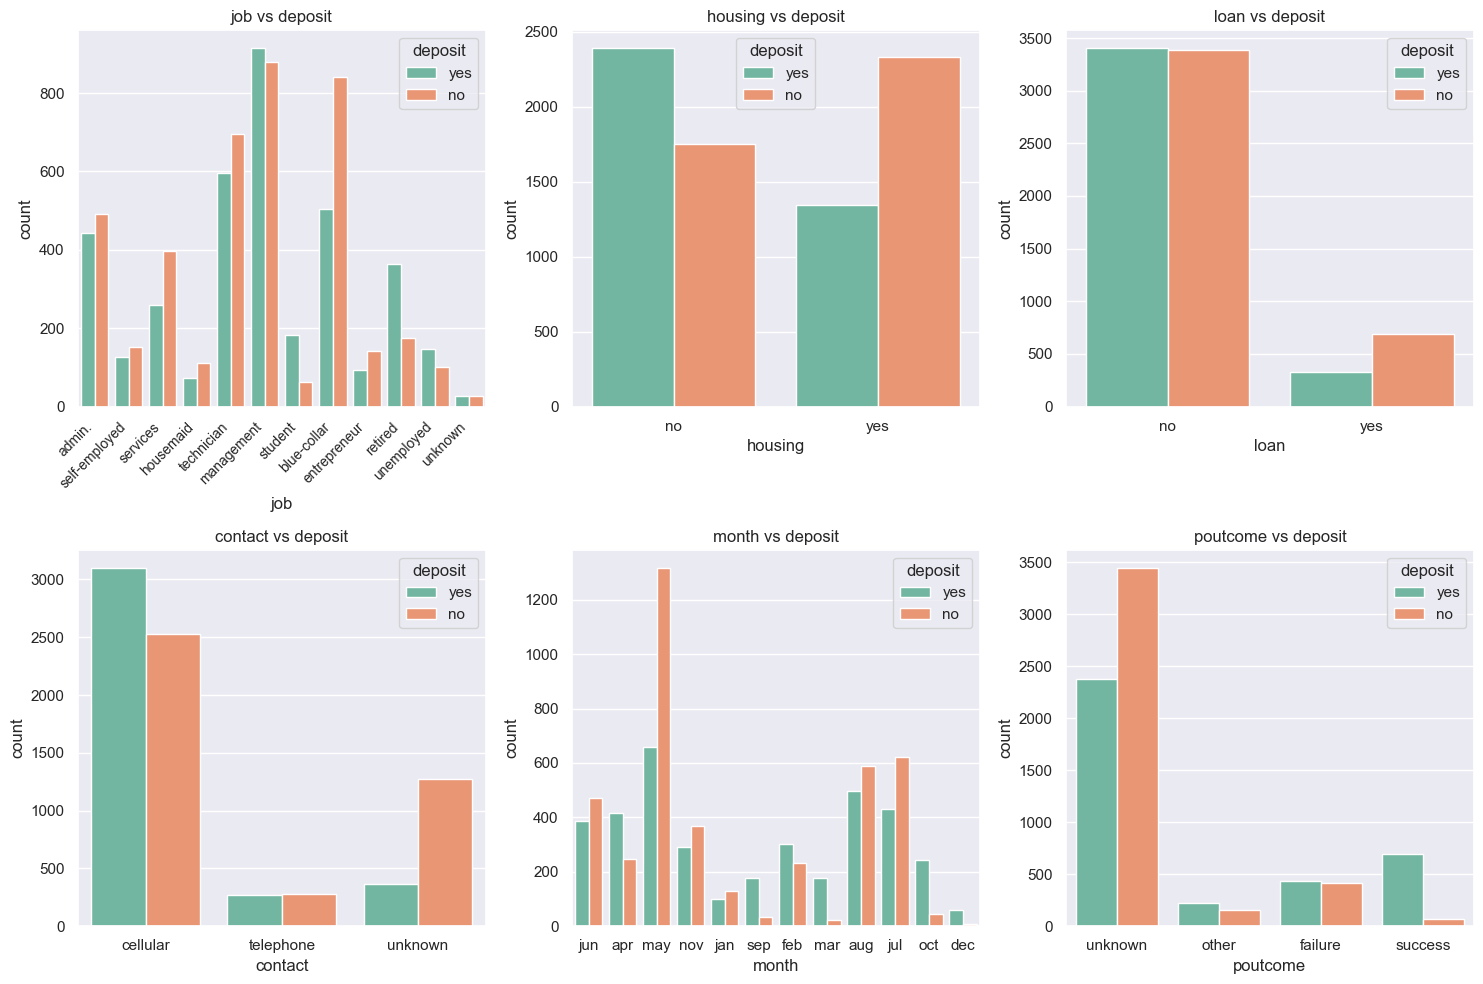

In [167]:
# Define the categorical features to plot
features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Set the figure size
plt.figure(figsize=(15, 10))
sns.set(palette='Set2')
plotnumber = 1

# Plot each categorical feature
for feature in features: 
    ax = plt.subplot(2, 3, plotnumber)
    sns.countplot(data=bank, x=feature, hue='deposit')
    plt.xlabel(feature)
    plt.title(f'{feature} vs deposit')
    
    # Rotate x-axis labels for better readability
    if feature == 'job':
        plt.xticks(rotation=45, ha='right', fontsize=10)
    
    plotnumber += 1
    plt.tight_layout()

plt.show()


**1. Job vs Deposit**
The count of people with different job types who did or did not make a deposit.
- Jobs like management, blue-collar, technician, and admin have higher counts.
- Higher deposit counts are seen in jobs like management and technician.
- Jobs like blue-collar and services have higher counts of 'no' for deposits.

**2. Housing vs Deposit**
The count of people with or without housing loans who did or did not make a deposit.
- People without a housing loan are more likely to make a deposit (green bars are taller for 'no' housing).
- People with a housing loan have a higher count of 'no' deposits.

**3. Loan vs Deposit**
The count of people with or without personal loans who did or did not make a deposit.
- People without a personal loan are more likely to make a deposit (green bars are significantly taller for 'no' loan).
- People with a personal loan generally tend to not make a deposit.

**4. Contact vs Deposit**
The count of people contacted via different methods who did or did not make a deposit.
- Cellular contact has the highest number of people making a deposit.
- Unknown contact method has more 'no' deposits compared to 'yes' deposits.
- Telephone contact shows a similar trend with more 'no' deposits.

**5. Month vs Deposit**
The count of people who did or did not make a deposit across different months.
- May has a very high count of 'no' deposits.
- Months like March, September, October, and December show higher 'yes' deposit counts compared to other months.

**6. Poutcome vs Deposit**
The count of people based on the outcome of the previous marketing campaign who did or did not make a deposit.
- If the outcome of the previous campaign was unknown, the likelihood of not making a deposit is higher.
- A successful previous outcome significantly increases the likelihood of a deposit.

In [168]:
def create_pivot(feature):
    bank_pivot = bank.pivot_table(
        index='deposit', 
        columns=feature, 
        values='age',  # Assuming 'age' can serve as a count proxy as there is no 'ID' column
        aggfunc='count'
    )
    bank_pivot.loc['Total'] = bank_pivot.sum()
    bank_pivot.loc['%'] = round((bank_pivot.loc['yes'] / bank_pivot.loc['Total']) * 100, 1)

    return bank_pivot.T.sort_values('%', ascending=False)


pivot_job = create_pivot('job')
pivot_housing = create_pivot('housing')
pivot_loan = create_pivot('loan')
pivot_contact = create_pivot('contact')
pivot_poutcome = create_pivot('poutcome')

print(pivot_job)
print(pivot_housing)
print(pivot_contact)
print(pivot_loan)
print(pivot_poutcome)


deposit           no    yes   Total     %
job                                      
student         63.0  184.0   247.0  74.5
retired        175.0  365.0   540.0  67.6
unemployed     102.0  147.0   249.0  59.0
management     878.0  914.0  1792.0  51.0
unknown         28.0   26.0    54.0  48.1
admin.         492.0  444.0   936.0  47.4
technician     696.0  595.0  1291.0  46.1
self-employed  153.0  127.0   280.0  45.4
entrepreneur   142.0   94.0   236.0  39.8
services       398.0  260.0   658.0  39.5
housemaid      112.0   72.0   184.0  39.1
blue-collar    842.0  504.0  1346.0  37.4
deposit      no     yes   Total     %
housing                              
no       1751.0  2389.0  4140.0  57.7
yes      2330.0  1343.0  3673.0  36.6
deposit        no     yes   Total     %
contact                                
cellular   2528.0  3100.0  5628.0  55.1
telephone   276.0   270.0   546.0  49.5
unknown    1277.0   362.0  1639.0  22.1
deposit      no     yes   Total     %
loan                  

## **Data Splitting**

In [169]:
# Select the features and target variable
X = bank.drop('deposit', axis=1)
y = bank['deposit']

In [170]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify=y, 
    test_size=0.2, 
    random_state=42
)

### **Data Preprocessing**

In [171]:
bank.describe(include='object').columns

Index(['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit'], dtype='object')

In [172]:
# transformer 
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome',])]
       , remainder= 'passthrough')

# scaler 
scaler = StandardScaler(with_mean=False)

In [173]:
transformer.fit(X_train)
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age',
 'balance',
 'campaign',
 'pdays']

### **Benchmark Model**

In [174]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgbc = XGBClassifier(random_state=42, verbosity=0)

In [175]:
y_train = np.where(y_train == 'yes', 1, 0)
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [176]:
from collections import Counter
Counter(y_train)

Counter({0: 3265, 1: 2985})

In [177]:
# check the best benchmark model 
models = [logreg, tree, rf, gbc, xgbc]
model_name = []
score = []
mean_value = []
train_score = []
std_value = []

for i in models : 
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    estimator = Pipeline([
        ('transformer', transformer), 
        ('scaler', scaler), 
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train, 
        y_train, 
        cv = skfold, 
        scoring='precision', 
        error_score='raise'
        )

    print(i, model_cv)


    score.append(model_cv)
    train_score.append(model_cv.mean())
    std_value.append(model_cv.std())
    model_name.append(i.__class__.__name__)

LogisticRegression() [0.75442478 0.6995614  0.7494824  0.75550661 0.73903967]
DecisionTreeClassifier(random_state=42) [0.60209424 0.57264957 0.62348877 0.6013289  0.59701493]
RandomForestClassifier(random_state=42) [0.71077505 0.70132325 0.71537002 0.69485294 0.70758123]
GradientBoostingClassifier(random_state=42) [0.76789588 0.75723831 0.7832618  0.75362319 0.75359343]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None

In [178]:
# Create a DataFrame to display the results
benchmark_model_train = pd.DataFrame({
    'Model': model_name,
    'train_score': train_score,
    'Standard Deviation': std_value
})

benchmark_model_train

,Model,train_score,Standard Deviation
0,LogisticRegression,0.739603,0.020851
1,DecisionTreeClassifier,0.599315,0.016202
2,RandomForestClassifier,0.705980,0.007200
3,GradientBoostingClassifier,0.763123,0.011349
4,XGBClassifier,0.709802,0.008015


In [179]:
y_test = np.where(y_test == 'yes', 1, 0)
y_test

array([0, 0, 0, ..., 0, 1, 0])

In [180]:
# check the best benchmark model on test
test_score = []
model_name = []
for i in models:
    model_pipeline = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])
    # fitting
    model_pipeline.fit(X_train, y_train)
    # predict
    y_pred_test = model_pipeline.predict(X_test)
    # evauate
    precision = precision_score(y_test, y_pred_test)
    test_score.append(precision)
    model_name.append(i.__class__.__name__)

In [181]:
benchmark_model_test = pd.DataFrame({
    'model': model_name,
    'test_score': test_score
}).sort_values(by='test_score', ascending=False)
benchmark_model_test

,model,test_score
3,GradientBoostingClassifier,0.779461
0,LogisticRegression,0.748288
4,XGBClassifier,0.743222
2,RandomForestClassifier,0.726172
1,DecisionTreeClassifier,0.607764


In [182]:
# combine and compare
benchmark_model = benchmark_model_test.set_index('model').join(benchmark_model_train.set_index('Model'))
benchmark_model.drop(columns= 'Standard Deviation', inplace=True)
benchmark_model['diff'] = benchmark_model['test_score'] - benchmark_model['train_score']
benchmark_model['diff'] = benchmark_model['diff'].agg(abs)
benchmark_model.sort_values(by='test_score', ascending=False)

,test_score,train_score,diff
model,,,
GradientBoostingClassifier,0.779461,0.763123,0.016339
LogisticRegression,0.748288,0.739603,0.008685
XGBClassifier,0.743222,0.709802,0.033420
RandomForestClassifier,0.726172,0.705980,0.020192
DecisionTreeClassifier,0.607764,0.599315,0.008449


Benchmark the one with best score VS the one with the most stable one (lowest diff):
* Gradient Boosting Classifier(the most stable one)
* XGBClassifier 


### Hyperparameter Tuning

Gradient Boosting Classifier

In [183]:
# depth of tree
max_depth = list(np.arange(1, 10))
# learning rate
learning_rate = list(np.arange(1, 100)/100)
# number of tree
n_estimators = list(np.arange(50, 500))
# number of train set in each tree
subsample = list(np.arange(2, 10)/10)
# number of features used for splitting
max_features = list(np.arange(1, 10)/10)
# Hyperparamater GBC
hyperparameter_space_GBC = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features
}

In [184]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits = 5)
# Benchmark Model 1
gbc = GradientBoostingClassifier(random_state = 42)
# Create algorithm chain
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('model', gbc)
])
# hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator = estimator_gbc,
    param_distributions = hyperparameter_space_GBC,
    cv = skf,
    scoring = 'precision',
    n_jobs = -1,
    n_iter = 20,
    random_state = 42
)

In [185]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(sparse_output=False),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome'])])),
                                             ('model',
                                              GradientBoostingClassifier(random_state=42))]),
                   n_iter=20, n_...
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, scoring='precision')

In [186]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score',ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.426995,0.030018,0.005810,0.002456,0.9,314,0.2,1,0.34,"{'model__subsample': 0.9, 'model__n_estimators...",0.735537,0.757764,0.739606,0.751515,0.756989,0.748282,0.009098,1
13,0.210813,0.007769,0.005106,0.001931,0.4,106,0.9,1,0.37,"{'model__subsample': 0.4, 'model__n_estimators...",0.715164,0.760825,0.731501,0.724272,0.734440,0.733240,0.015314,2
16,0.573812,0.030744,0.010026,0.004486,0.3,388,0.7,1,0.18,"{'model__subsample': 0.3, 'model__n_estimators...",0.729839,0.737255,0.715768,0.721344,0.733193,0.727480,0.007856,3
14,0.781653,0.017885,0.009671,0.004048,0.7,460,0.4,1,0.74,"{'model__subsample': 0.7, 'model__n_estimators...",0.727459,0.741036,0.723077,0.705882,0.737844,0.727060,0.012459,4
3,1.106562,0.146659,0.009158,0.000618,0.9,370,0.9,1,0.93,"{'model__subsample': 0.9, 'model__n_estimators...",0.725646,0.729524,0.704255,0.695906,0.719665,0.714999,0.012853,5
8,0.521901,0.030042,0.005904,0.001742,0.4,373,0.2,1,0.51,"{'model__subsample': 0.4, 'model__n_estimators...",0.705202,0.721495,0.719917,0.697802,0.722000,0.713283,0.009924,6
4,0.274384,0.009831,0.006651,0.001607,0.6,73,0.7,3,0.73,"{'model__subsample': 0.6, 'model__n_estimators...",0.706334,0.717602,0.664137,0.681495,0.720472,0.698008,0.021808,7
6,2.183941,0.052106,0.017350,0.001470,0.3,361,0.9,6,0.08,"{'model__subsample': 0.3, 'model__n_estimators...",0.697802,0.707447,0.661080,0.681818,0.717308,0.693091,0.019832,8
1,1.692478,0.120945,0.020147,0.011221,0.8,359,0.7,2,0.56,"{'model__subsample': 0.8, 'model__n_estimators...",0.684015,0.701439,0.692771,0.684859,0.685259,0.689669,0.006674,9
9,0.229143,0.016035,0.005800,0.002596,0.4,87,0.8,2,0.91,"{'model__subsample': 0.4, 'model__n_estimators...",0.686924,0.731313,0.652830,0.670956,0.702703,0.688945,0.026894,10


In [187]:
print('Gradient Boosting Classifier')
print('Best_Score:', random_gbc.best_score_)
print('Best_Params:', random_gbc.best_params_)

Gradient Boosting Classifier
Best_Score: 0.7482823381959128
Best_Params: {'model__subsample': 0.9, 'model__n_estimators': 314, 'model__max_features': 0.2, 'model__max_depth': 1, 'model__learning_rate': 0.34}


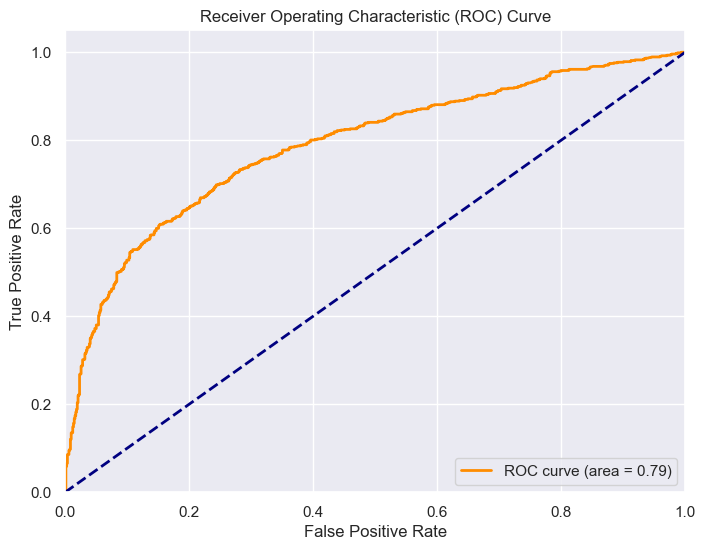

In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

best_gbc_model = random_gbc.best_estimator_

# Predict probabilities
y_pred_proba = best_gbc_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


1. True Positive Rate (TPR) vs. False Positive Rate (FPR):

The ROC curve plots the True Positive Rate (also known as sensitivity or recall) against the False Positive Rate (1 - specificity) at various threshold settings.
A perfect classifier would have a point in the top left corner of the plot (FPR=0, TPR=1), corresponding to 100% sensitivity (no false negatives) and 100% specificity (no false positives).

2. ROC Curve Shape:

The orange line represents the performance of the GBC. It starts at the origin (0,0) and rises towards the top left corner as the threshold is lowered.
The curve is above the diagonal line (blue dashed line), indicating that the model performs better than random guessing.

3. Area Under the Curve (AUC):

The AUC value of 0.79 indicates that there is a 79% chance that the model will correctly distinguish between a positive and a negative instance.
An AUC of 0.5 represents a model with no discriminative ability, equivalent to random guessing. An AUC of 1.0 represents a perfect model.

4. Model Performance:

An AUC of 0.79 suggests that the GBC has good discriminative ability. It's not perfect, but it is significantly better than random guessing.
This score indicates that the model is effective at distinguishing between the two classes (those who will deposit and those who will not) in the bank campaign dataset.

In summary, the ROC curve and AUC score indicate that the Gradient Boosting Classifier, after hyperparameter tuning, has a good ability to differentiate between customers who are likely to deposit and those who are not. The model is effective but still has room for improvement to achieve even higher discrimination power.

XGBoost

In [189]:
# depth of tree
max_depth = list(np.arange(1, 10))

# learning rate
learning_rate = list(np.arange(1, 100)/100)

# number of tree
n_estimators = list(np.arange(50, 300))

# number of train set in each tree
subsample = list(np.arange(2, 10)/10)

# gamma means the minimum impurity will be decreased 
gamma = list(np.arange(1,11))

# number of feature 
colsample_bytree = list(np.arange(1,10)/10)

# regularization
reg_alpha = list(np.logspace(-3,1,10))

# Hyperparamater GBC
hyperparameter_space_XGBC = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma:' : gamma,
    'model__colsample_bytree' : colsample_bytree,
    'model__max_features': max_features
}

In [190]:
# benchmark model 2 
xgbc = XGBClassifier(random_state = 42, verbosity = 0)

# create the algorithm chain 
estimator_xgbc = Pipeline([
    ('transformer', transformer),
    ('model', xgbc)
])

# hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator = estimator_xgbc,
    param_distributions = hyperparameter_space_XGBC,
    cv = skf,
    scoring = 'precision',
    n_jobs = -1,
    n_iter = 20,
    random_state = 42
)

In [191]:
random_xgbc.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(sparse_output=False),
                                                                               ['job',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'poutcome'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            c...
                                                                 0.23, 0.24,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29, 0.3, ...],
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'model__max_features': [0.1, 0.2, 0.3,
                                                                0.4, 0.5, 0.6,
                                                                0.7, 0.8, 0.9],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, scoring='precision')

In [192]:
print('Xtreme Gradient Boosting Classifier')
print('Best_Score:', random_xgbc.best_score_)
print('Best_Params: ', random_xgbc.best_params_)

Xtreme Gradient Boosting Classifier
Best_Score: 0.7642094267390325
Best_Params:  {'model__subsample': 0.5, 'model__n_estimators': 81, 'model__max_features': 0.9, 'model__max_depth': 7, 'model__learning_rate': 0.03, 'model__gamma:': 10, 'model__colsample_bytree': 0.9}


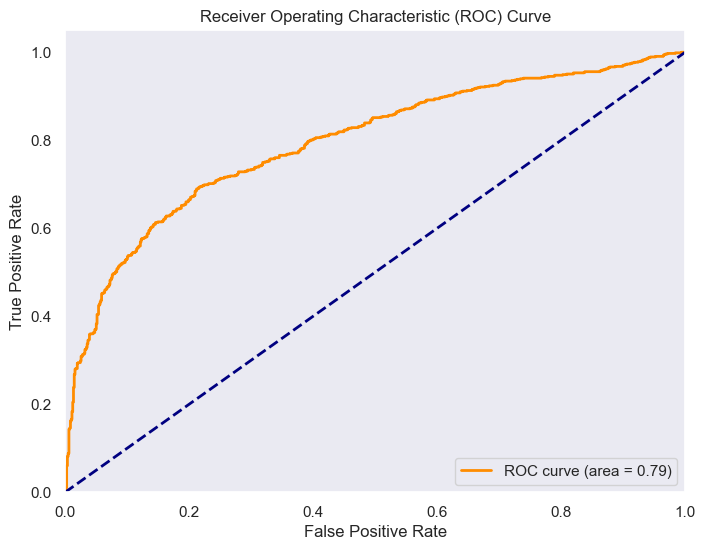

AUC Score: 0.79


In [193]:

best_xgbc_model = random_xgbc.best_estimator_
# Fit the best model to the training data
best_xgbc_model.fit(X_train, y_train)

# Predict probabilities for the test data
y_pred_proba = random_xgbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f'AUC Score: {roc_auc:.2f}')

## Model Performance in Test

GBC Before & After Tuning

In [194]:
benchmark_model #model before tuning

,test_score,train_score,diff
model,,,
GradientBoostingClassifier,0.779461,0.763123,0.016339
LogisticRegression,0.748288,0.739603,0.008685
XGBClassifier,0.743222,0.709802,0.033420
RandomForestClassifier,0.726172,0.705980,0.020192
DecisionTreeClassifier,0.607764,0.599315,0.008449


In [195]:
# before tuning
model = GradientBoostingClassifier()

model_pipe_gbc = Pipeline([
    ('transformer', transformer),
    ('model', model)
])

model_pipe_gbc.fit(X_train,y_train)

y_pred = model_pipe_gbc.predict(X_test)
precision_score(y_test, y_pred)

0.7794612794612794

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.62      0.69       747

    accuracy                           0.73      1563
   macro avg       0.74      0.73      0.73      1563
weighted avg       0.74      0.73      0.73      1563



In [197]:
# GBC Model after tuning
gbc_tuning = random_gbc.best_estimator_

y_pred_gbc_tuning = gbc_tuning.predict(X_test)
print(precision_score(y_test, y_pred_gbc_tuning))

0.7661691542288557


In [198]:
print(classification_report(y_test, y_pred_gbc_tuning))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       816
           1       0.77      0.62      0.68       747

    accuracy                           0.73      1563
   macro avg       0.73      0.72      0.72      1563
weighted avg       0.73      0.73      0.72      1563



Comparing the performance of the Gradient Boosting Classifier (GBC) before and after hyperparameter tuning, we observe that the precision slightly decreased from 0.779 to 0.766. Both models maintain the same overall accuracy of 0.73. Before tuning, the GBC shows a slightly higher precision predicting positive cases (precision: 0.78) compared to the tuned model (precision: 0.77). 

Text(0.5, 1.0, 'GBC After Tuning ')

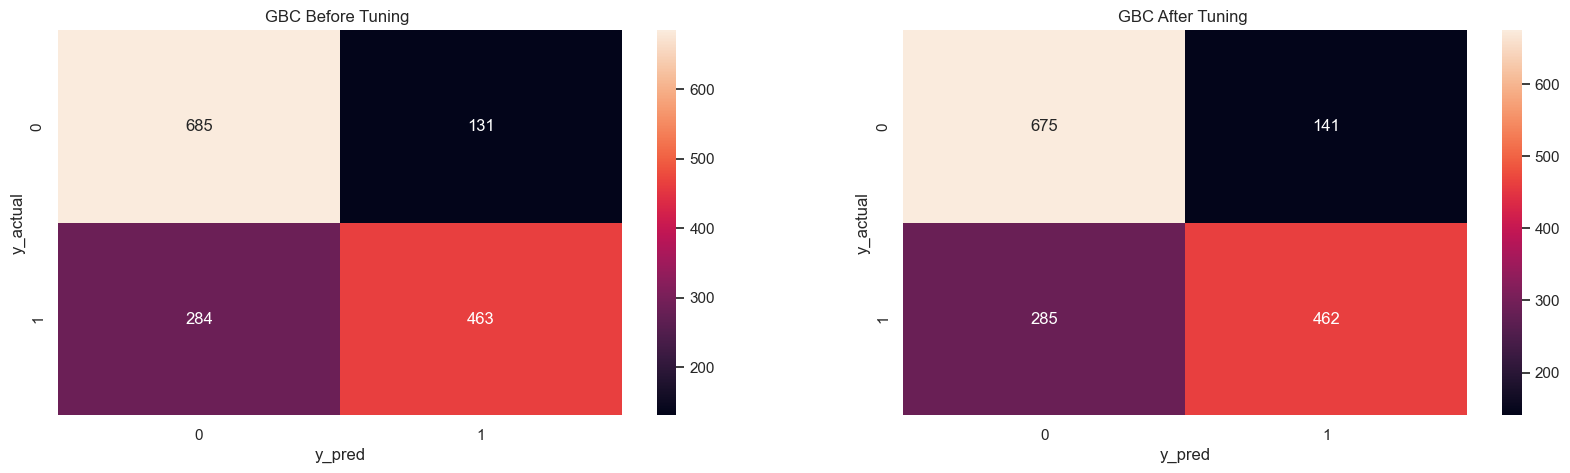

In [199]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC Before Tuning ')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gbc_tuning), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC After Tuning ')

XGBC Before & After tuning

In [200]:
benchmark_model

,test_score,train_score,diff
model,,,
GradientBoostingClassifier,0.779461,0.763123,0.016339
LogisticRegression,0.748288,0.739603,0.008685
XGBClassifier,0.743222,0.709802,0.033420
RandomForestClassifier,0.726172,0.705980,0.020192
DecisionTreeClassifier,0.607764,0.599315,0.008449


In [201]:
# before 

model = XGBClassifier(random_state = 42, verbosity =0)

model_pipe_xgbc = Pipeline([
    ('transformer', transformer), 
    ('model', model)
])

model_pipe_xgbc.fit(X_train,y_train)

y_pred_xgbc = model_pipe_xgbc.predict(X_test)
precision_score(y_test,y_pred_xgbc)

0.7432216905901117

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       816
           1       0.78      0.62      0.69       747

    accuracy                           0.73      1563
   macro avg       0.74      0.73      0.73      1563
weighted avg       0.74      0.73      0.73      1563



In [203]:
# After tuning
xgbc_tuning = random_xgbc.best_estimator_

y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)
precision_score(y_test,y_pred_xgbc_tuning)

0.785958904109589

In [204]:
print(classification_report(y_test,y_pred_xgbc_tuning))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       816
           1       0.79      0.61      0.69       747

    accuracy                           0.74      1563
   macro avg       0.75      0.73      0.73      1563
weighted avg       0.74      0.74      0.73      1563



Comparing the performance of the XGBoost Classifier (XGBC) before and after hyperparameter tuning, we see an improvement in precision from 0.743 to 0.786 and a slight increase in overall accuracy from 0.73 to 0.74. The tuned model also shows better precision for positive cases (0.79 compared to 0.78)

Text(0.5, 1.0, 'GBC After Tuning ')

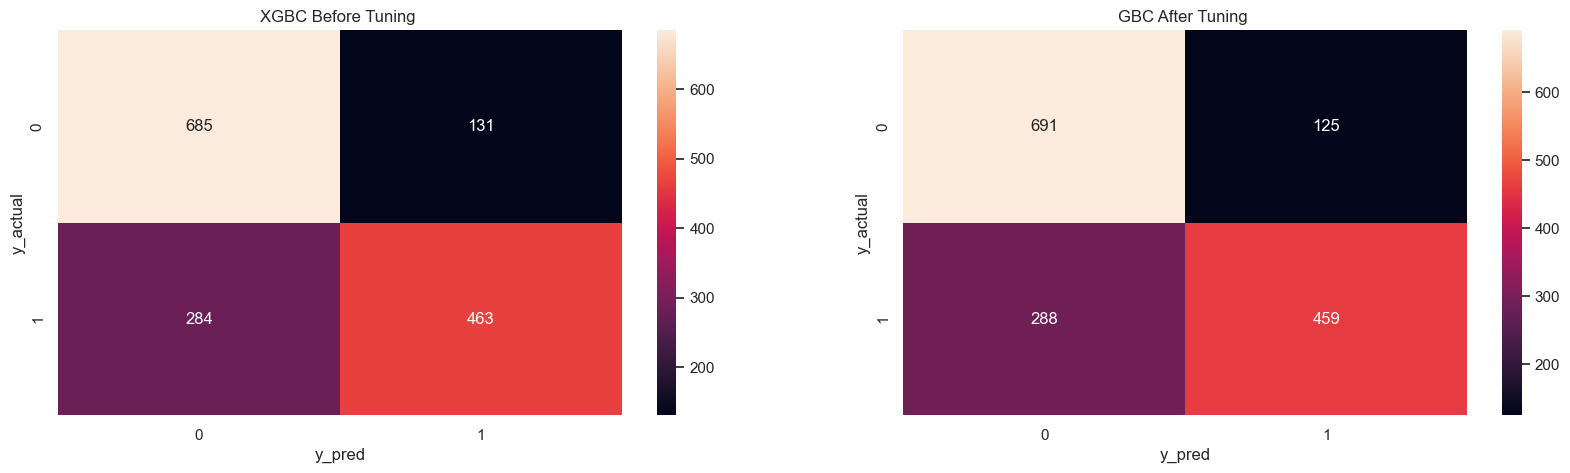

In [205]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('XGBC Before Tuning ')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('GBC After Tuning ')

**Best Model Score = XGBC After Tuning**

* **TP : 469**
* **TN : 690** 
* **FP : 126**
* **FN : 278**

 

## FINAL MODEL

In [206]:
# Best Model 
model_final = xgbc_tuning

# predict
y_prob= model_final.predict_proba(X_test)
y_pred= np.where(y_prob>0.49,1,0)

## Feature Importance

In [207]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features;

In [208]:
imp = model_final[-1].feature_importances_
imp;

In [209]:
# to dataframe 
feature_imp = pd.DataFrame({
    'Importance': imp, 
    'Feature': list_features
}).sort_values(by='Importance', ascending=False)
feature_imp

,Importance,Feature
33,0.208389,poutcome_success
18,0.184076,contact_unknown
26,0.039488,month_mar
16,0.037618,contact_cellular
12,0.035738,housing_no
19,0.035014,month_apr
25,0.031419,month_jun
30,0.029546,month_sep
29,0.026046,month_oct
21,0.025739,month_dec


<Axes: xlabel='Importance', ylabel='Feature'>

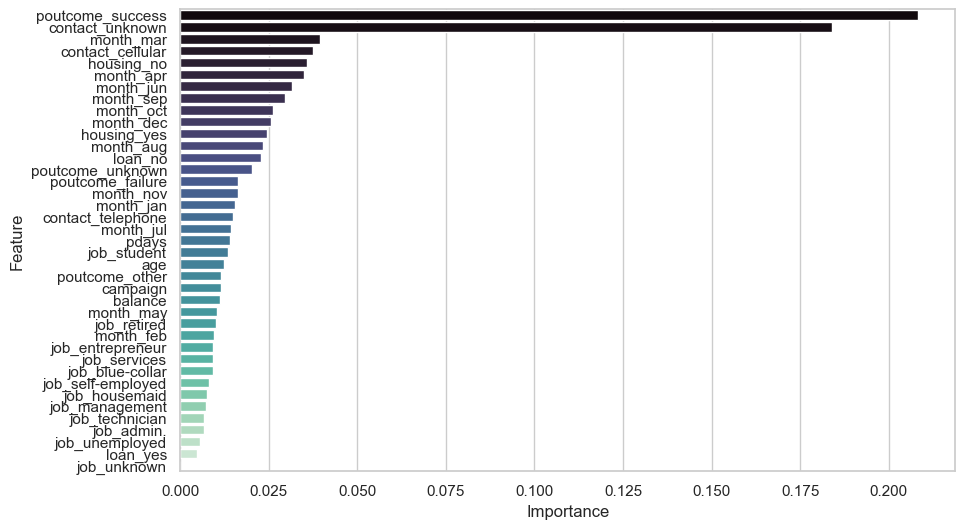

In [210]:
# Visualization 

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'mako')

The feature importance plot from the XGBoost classifier indicates that the most influential features for predicting whether a client will make a deposit are the success of previous marketing campaigns __(poutcome_success)__, __unknown contact__ type (other than cellular and telephone), and contacts made in March __(month_mar)__. Other significant features include the use of cellular phones for contact __(contact_cellular)__ and whether clients have housing loans. Seasonal trends are also evident, with specific months like April, June, and December being important. These insights suggest that past campaign outcomes, the method and timing of contact, and clients' financial status are key factors in predicting deposit likelihood.

In [251]:
import pickle 

model_final = xgbc_tuning
model_final.fit(X_train, y_train)

pickle.dump(model_final, open('Capstone_3_helvila.pkl', 'wb'))

In [212]:
model_loaded = pickle.load(open('Capstone_3_helvila.pkl','rb'))

In [252]:
df_test_model = pd.DataFrame({
    'age': [30, 25],  # example numerical feature
    'job': ['management', 'student'],
    'balance': [20000, 5000],
    'housing': ['yes', 'no'],
    'loan': ['no', 'no'],
    'contact': ['cellular', 'unknown'],
    'month': ['apr', 'may'],
    'campaign': [1, 3],
    'pdays': [999, -1],
    'poutcome': ['success', 'unknown']

})
display(df_test_model)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,30,management,20000,yes,no,cellular,apr,1,999,success
1,25,student,5000,no,no,unknown,may,3,-1,unknown


In [250]:
# predict that data
print("Predict range: ",model_loaded.predict(df_test_model))

Predict range:  [1 0]


Based on the prediction results, the model indicates that the customer will subscribe to a deposit. This insight can help the bank tailor its marketing and customer engagement strategies to increase deposit subscriptions effectively.

## SHAP

In [ ]:
import shap

In [ ]:
# explainer 
explainer = shap.Explainer(
    model_final[1].predict, 
    model_final[0].transform(X_test)
)

shap_values = explainer(model_final[0].transform(X_test))

PermutationExplainer explainer: 1564it [00:24, 37.43it/s]                          


In [ ]:
[ i for i in enumerate(list_features)]

[(0, 'job_admin.'),
 (1, 'job_blue-collar'),
 (2, 'job_entrepreneur'),
 (3, 'job_housemaid'),
 (4, 'job_management'),
 (5, 'job_retired'),
 (6, 'job_self-employed'),
 (7, 'job_services'),
 (8, 'job_student'),
 (9, 'job_technician'),
 (10, 'job_unemployed'),
 (11, 'job_unknown'),
 (12, 'housing_no'),
 (13, 'housing_yes'),
 (14, 'loan_no'),
 (15, 'loan_yes'),
 (16, 'contact_cellular'),
 (17, 'contact_telephone'),
 (18, 'contact_unknown'),
 (19, 'month_apr'),
 (20, 'month_aug'),
 (21, 'month_dec'),
 (22, 'month_feb'),
 (23, 'month_jan'),
 (24, 'month_jul'),
 (25, 'month_jun'),
 (26, 'month_mar'),
 (27, 'month_may'),
 (28, 'month_nov'),
 (29, 'month_oct'),
 (30, 'month_sep'),
 (31, 'poutcome_failure'),
 (32, 'poutcome_other'),
 (33, 'poutcome_success'),
 (34, 'poutcome_unknown'),
 (35, 'age'),
 (36, 'balance'),
 (37, 'campaign'),
 (38, 'pdays')]

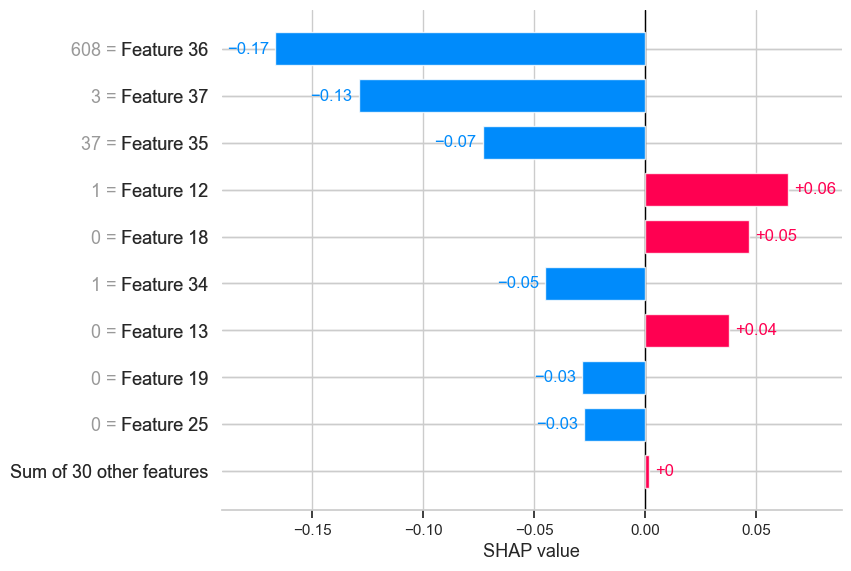

In [ ]:
shap.plots.bar(shap_values[1])

In [ ]:
# shap_values for explain all features in train
X_train_trans = model_final[0].transform(X_train)
# explainer
explainer = shap.TreeExplainer(
    model_final.named_steps['model'],
    data = X_train_trans,
    feature_perturbation = 'interventional',
    model_output = 'probability'
)
# shap values
shap_values = explainer(X_train_trans)

 95%|=================== | 5928/6250 [00:17<00:00]       

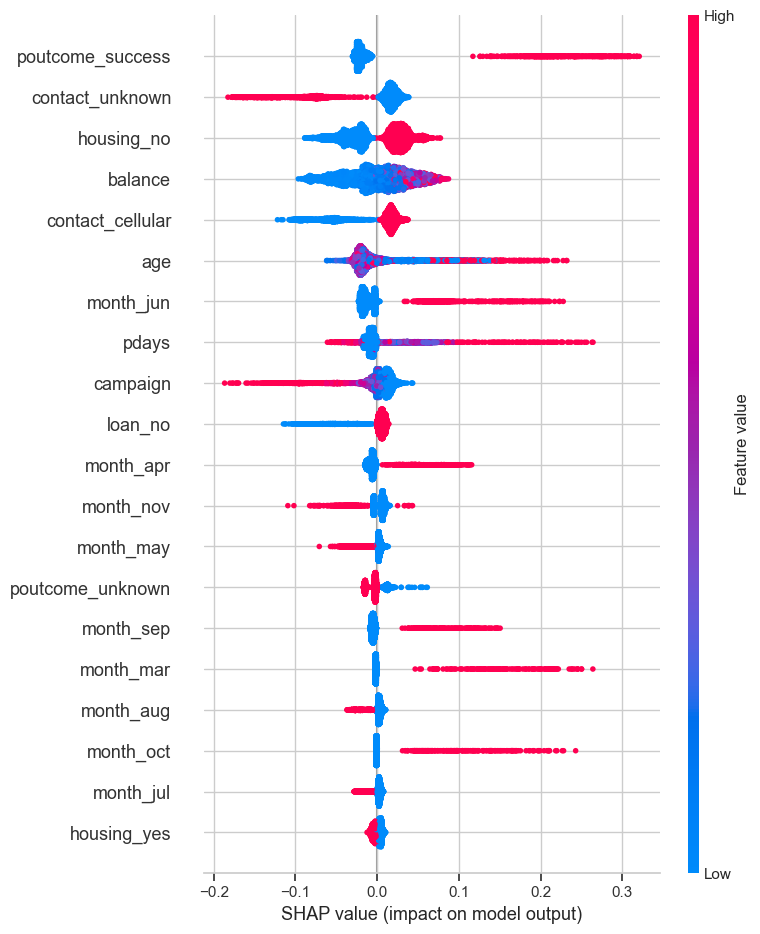

In [ ]:
shap.summary_plot(
    shap_values, 
    X_train_trans, 
    feature_names = list_features
)

## Conclusion

The final model (tuned XGBC) has demonstrated (precision: 0.79) its ability to predict customer behavior regarding bank deposit subscriptions effectively. This is evidenced by its significant role in enhancing the bank's ability to identify potential customers who are likely to subscribe, thus directly addressing the business problem of improving conversion rates in deposit subscriptions.

## Recomendation

**Recommendations to the Bank's Marketing Team:**

1. Optimize Contact Strategies:
Prioritize cellular contacts, which although more costly than telephone, are less expensive than unknown methods and have shown a strong influence on the customer’s decision to subscribe, as reflected in feature importance rankings. This balance of cost and effectiveness is crucial for maximizing ROI.

2. Refine Targeting Using Model Insights:
Leverage insights from the model to tailor communications specifically to segments identified as more likely to convert. By doing so, the bank can enhance customer engagement through personalized offers and information, leading to higher conversion rates and customer satisfaction.